# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [8]:
import pandas as pd

N = 8
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]

In [9]:
import pandas as pd

data = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")

## 1

In [10]:
import numpy as np

np.mean(data[col])

np.float64(6.489766666666668)

In [11]:
np.var(data[col])

np.float64(2.221485278888889)

In [12]:
import scipy

scipy.stats.mode(data[col])

ModeResult(mode=np.float64(6.1), count=np.int64(89))

In [13]:
np.median(data[col])

np.float64(6.5)

In [14]:
np.quantile(data[col], 0.25)

np.float64(5.5)

Квантиль порядка 0.5 - это медиана

In [15]:
np.quantile(data[col], 0.75)

np.float64(7.5)

In [16]:
scipy.stats.kurtosis(data[col])

np.float64(-0.2969486466071465)

In [17]:
scipy.stats.skew(data[col])

np.float64(0.011848322655812933)

In [18]:
scipy.stats.iqr(data[col])

np.float64(2.0)

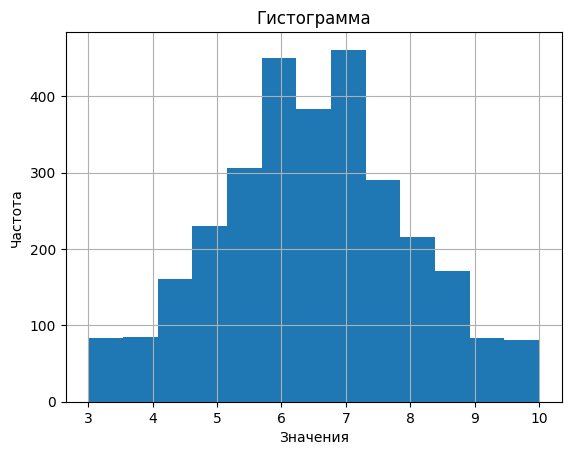

In [19]:
import matplotlib.pyplot as plt

n = len(data[col])
data[col].hist(bins=1 + int(1 + int(np.log2(n))))
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

In [20]:
import typing as tp


def stat_distribution(data: tp.List[float]) -> tp.Tuple[tp.List[float], tp.List[float]]:
    sorted_data = sorted(data)
    n = len(sorted_data)
    k = 1 + int(np.log2(n))

    x_min = min(data)
    x_max = max(data)
    h = (x_max - x_min) / k
    a = [x_min + i * h for i in range(k + 1)]

    cumulative_freq = [0]
    for i in range(1, k + 1):  # все равно nlog(n) так что, надеюсь, не очень страшно
        count = sum(1 for x in sorted_data if a[i - 1] <= x < a[i])
        cumulative_freq.append(cumulative_freq[-1] + count)

    cumulative_freq = [freq / n for freq in cumulative_freq]
    return a, cumulative_freq


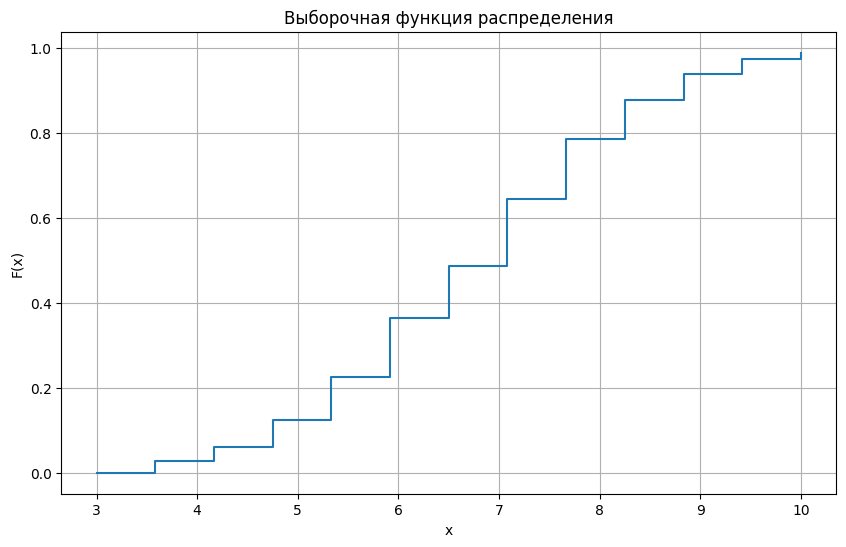

In [21]:
plt.figure(figsize=(10, 6))
plt.step(*stat_distribution(data[col]), where='post')
plt.title('Выборочная функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

В итоге у нас бимодальное распределение, у которого правый хвост чуть "тяжелее" (коэффициент ассиметрии чуть больше 0) и само оно почти симметричное (по той же причине). Т.е. скорее всего мы сразу получили не очень хорошие данные и их нужно или разбить на подвыборки и исследовать их отдельно, или провести какую-либо обработку данных

## 2

In [22]:
from scipy import stats
from scipy.stats import norm, chi2


def qhi_test(data: tp.List[float], alpha=0.05) -> bool:
    n = len(data)
    k = 1 + int(np.log2(n))
    intervals = np.linspace(min(data), max(data), k + 1)
    real_freq, bin_edges = np.histogram(data, bins=intervals)
    expected_freq = np.array([norm.cdf(bin_edges[i + 1], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) - norm.cdf(
        bin_edges[i], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) for i in range(k)]) * n
    chi_stat = np.sum((real_freq - expected_freq) ** 2 / (expected_freq + 1e-6))
    deg = k - 1 - 2
    crit_val = chi2.ppf(1 - alpha / 2, deg) + (1 - chi2.ppf(alpha / 2, deg))
    return chi_stat < crit_val


In [23]:
qhi_test(data[col])

np.False_

In [24]:
_, pval = scipy.stats.normaltest(data[col])
pval < (alpha := 0.05)  # т.е. отвергаем нулевую гипотезу, что пришло из нормального

np.True_

In [25]:
pval

np.float64(0.0005638709573326588)

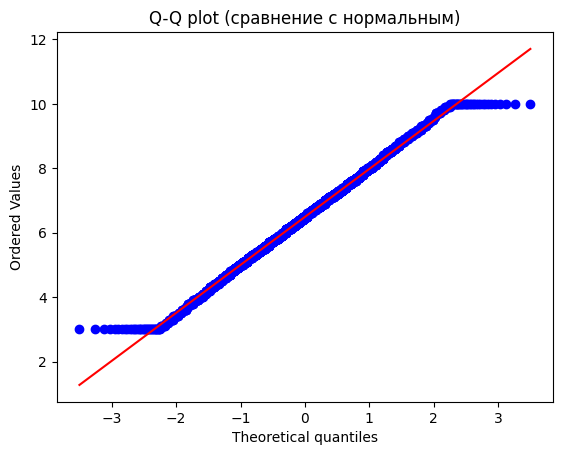

In [26]:
stats.probplot(data[col], dist="norm", plot=plt)
plt.title("Q-Q plot (сравнение с нормальным)")
plt.show()

Нет, оба теста говорят, что дулевая гипотеза о том, что данные пришли из нормального распределния - ложна. Q-Q плот одновременно напоминает нормальное и равномерное (из-за обрезанных "хвостов") распределения ([то, при помощи чего пытался разобраться](https://habr.com/ru/articles/578754))

# 3

In [27]:
from collections import Counter

sorted(Counter(data[col]).keys())

[3.0,
 3.1,
 3.2,
 3.3,
 3.4,
 3.5,
 3.6,
 3.7,
 3.8,
 3.9,
 4.0,
 4.1,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 4.9,
 5.0,
 5.1,
 5.2,
 5.3,
 5.4,
 5.5,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.1,
 6.2,
 6.3,
 6.4,
 6.5,
 6.6,
 6.7,
 6.8,
 6.9,
 7.0,
 7.1,
 7.2,
 7.3,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.0,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.8,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 9.9,
 10.0]

Можно заметить, что явных выбросов нет

In [28]:
from scipy.stats import boxcox, zscore
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

datas = [scipy.stats.zscore(np.log(data[col]) - np.min(data[col]) + 1e-12),
         scipy.stats.zscore(data[col]),
         scipy.stats.zscore(np.log1p(np.abs(np.log(data[col]) - np.mean(data[col]))) * np.sign(data[col])),
         pt.fit_transform(data[[col]]),
         np.log1p(data[col]),
         np.exp(data[col])
         ]
datas_res = [scipy.stats.normaltest(data)[1] for data in datas]
datas_res = [np.ravel(d) for d in datas_res]
max_idx = np.argmax(datas_res)
data_new = [elem[0] for elem in datas[max_idx]]
max_idx

np.int64(3)

In [29]:
_, pval = scipy.stats.normaltest(data_new)
pval

np.float64(0.0007449048171717407)

## 3.2

In [30]:
np.mean(data_new)

np.float64(-2.877698079828406e-16)

In [31]:
np.var(data_new)

np.float64(1.0)

In [32]:
scipy.stats.mode(data_new)

ModeResult(mode=np.float64(-0.255454990316795), count=np.int64(89))

In [33]:
np.median(data_new)

np.float64(0.013025134557306327)

In [34]:
np.quantile(data_new, 0.25)

np.float64(-0.6599226981566061)

In [35]:
np.quantile(data_new, 0.75)

np.float64(0.6805190319108813)

In [36]:
scipy.stats.kurtosis(data_new)

np.float64(-0.2911472048214878)

In [37]:
scipy.stats.skew(data_new)

np.float64(-0.020130114711828056)

In [38]:
scipy.stats.iqr(data_new)

np.float64(1.3404417300674873)

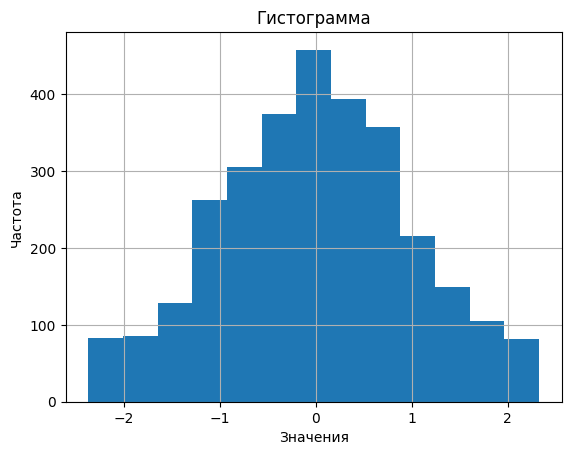

In [39]:
import matplotlib.pyplot as plt

pd.DataFrame(data_new).hist(bins=1 + int(1 + int(np.log2(n))))
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

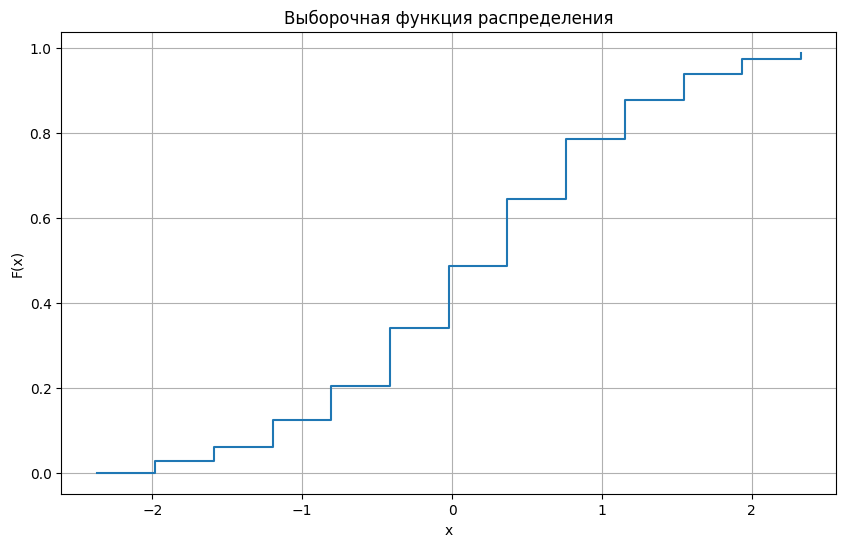

In [40]:
plt.figure(figsize=(10, 6))
plt.step(*stat_distribution(data_new), where='post')
plt.title('Выборочная функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

In [41]:
qhi_test(data_new, 0.05)

np.False_

In [42]:
_, pval = scipy.stats.normaltest(data_new)

In [43]:
pval < (alpha := 0.05)  # т.е. отвергаем нулевую гипотезу, что пришло из нормального

np.True_

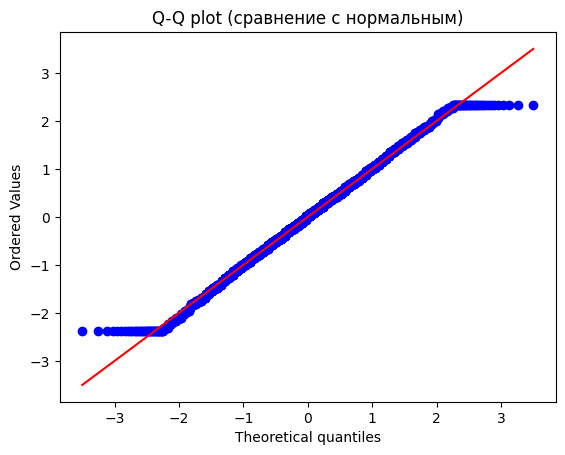

In [44]:
stats.probplot(data_new, dist="norm", plot=plt)
plt.title("Q-Q plot (сравнение с нормальным)")
plt.show()

Нет, данные не удалось привести к нормальному виду, однако теперь распределение явно уномодальное, но у него все еще более "легкие" хвосты, по сравнению с нормальным распределением и правый хвост чуть более тяжелый

### 4

In [45]:
import pandas as pd

groups = pd.DataFrame(data).groupby("School_Grade")

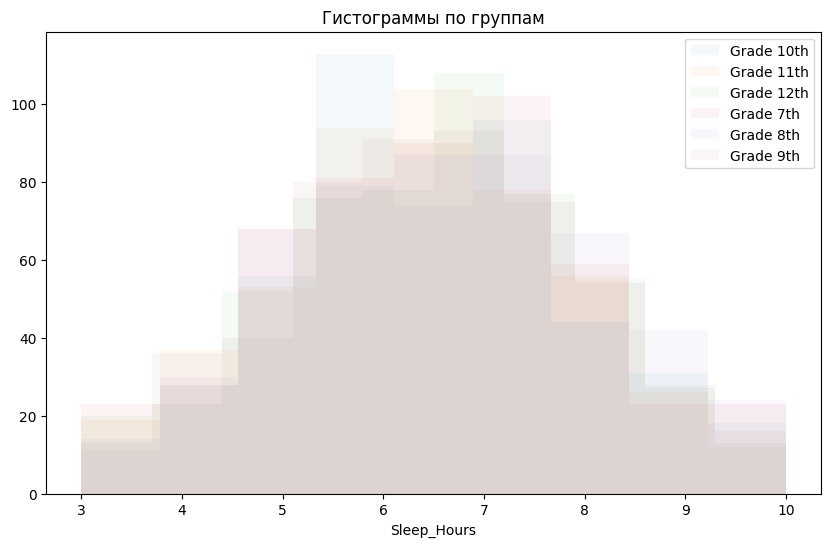

In [46]:
plt.figure(figsize=(10, 6))
for grade, subset in groups:
    k = 1 + int(np.log2(len(subset)))
    plt.hist(subset[col], bins=k, alpha=0.05, label=f"Grade {grade}")

plt.xlabel(col)
plt.ylabel("")
plt.title("Гистограммы по группам")
plt.legend()
plt.show()

In [47]:
groups[col].agg(["mean", "var"])

,mean,var
School_Grade,,
10th,6.488296,2.102064
11th,6.367432,2.113079
12th,6.459735,2.201804
7th,6.483702,2.287617
8th,6.675311,2.406853
9th,6.468441,2.196945


Нетрудно заметить, что у нас как минимум 4 разные моды у полученных уномодальных распределений. Также дисперсия и среднее зависят от номера класса (только 9 и 12 класс распределены почти с одинаковыми параметрами). То есть возможно, что данные пришли из разных распределений (хотя код ниже говорит, что мы не можем отвергнуть гипотезу, что средние и медианы в группах имеют равные значение)

In [62]:
groups = [data.loc[data["School_Grade"] == g, col] for g in data["School_Grade"].unique()]

f_stat, p_val = scipy.stats.f_oneway(*groups)

In [63]:
p_val < alpha
p_val

np.float64(0.05075956986828881)

In [64]:
f_stat, p_val = scipy.stats.kruskal(*groups)

In [65]:
p_val < alpha
p_val

np.float64(0.09285861082515591)